In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Load The Dataset

from loading the dataset we know that the dataset has 12 features. They are chemical parameters in wine. In this project I try to classify quality of wine. From basic analysis we know there is not any missing value in the dataset. Almost of all feature has float data type except **quality** parameter. Then, I continue to EDA. 

In [3]:
path ='../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv'
rawData = pd.read_csv(path)
rawData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
rawData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
rawData.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [40]:
from sklearn.preprocessing import MinMaxScaler
data = rawData.copy()
data1= data.drop('quality', axis=1)
scaler = MinMaxScaler()
dataScaled = pd.DataFrame(scaler.fit_transform(data), columns=[rawData.columns])
dataST = dataScaled.drop('quality', axis=1)
dataST

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [8]:
X = dataST
y = rawData['quality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
xTrain, xVal, yTrain, yVal = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

## Exploratory Data Analysis

The data exploratory analysis it self I broke down into two parts there are univariate analysis and bivariate analysis.

##  Univariate Analysis

In the univariate analysis I try to understand the distribution each feature visually and statitstic test. The data of each feature I visualize with histogram to see the pattern of the data. The data looks have normal distribution in a glance but I need validate this visual result with statistic test. I am using saphiro wilk test to know the distribution of each feature. From saphiro test we know that all feature doesn't have normal distribution.



In [9]:
def histPlot(col):
    sns.histplot(x=col, data=rawData)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

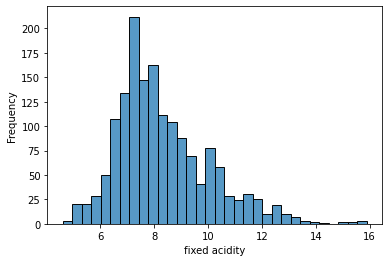

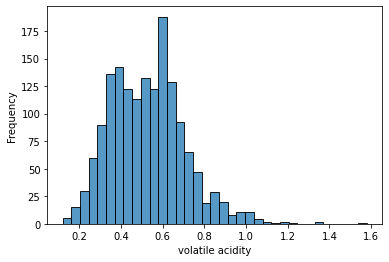

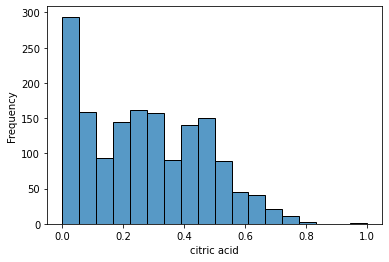

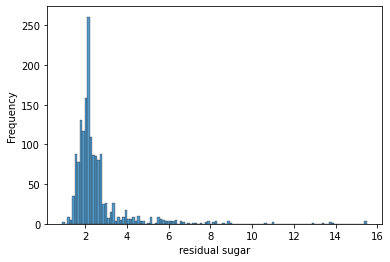

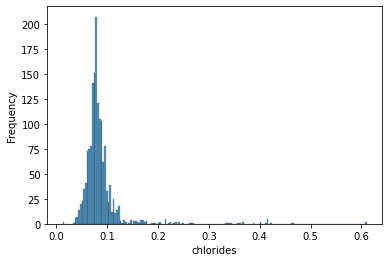

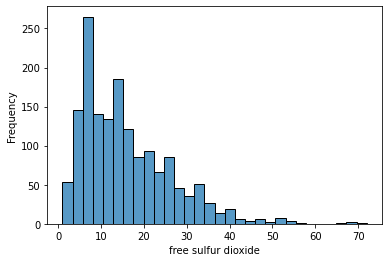

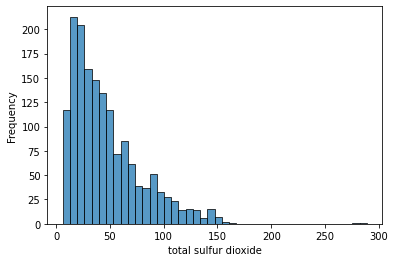

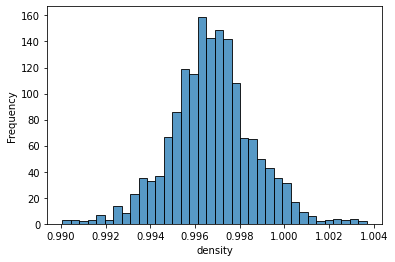

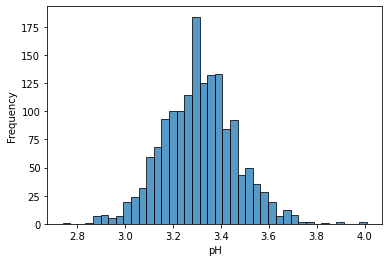

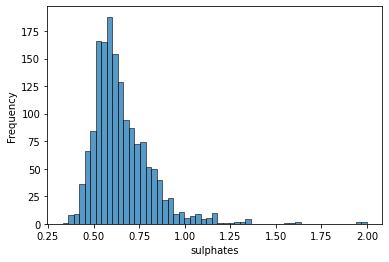

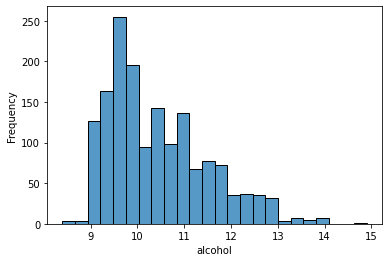

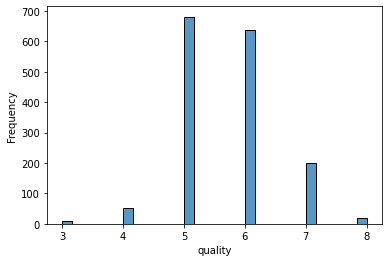

In [10]:
for col in rawData.columns:
    histPlot(col)

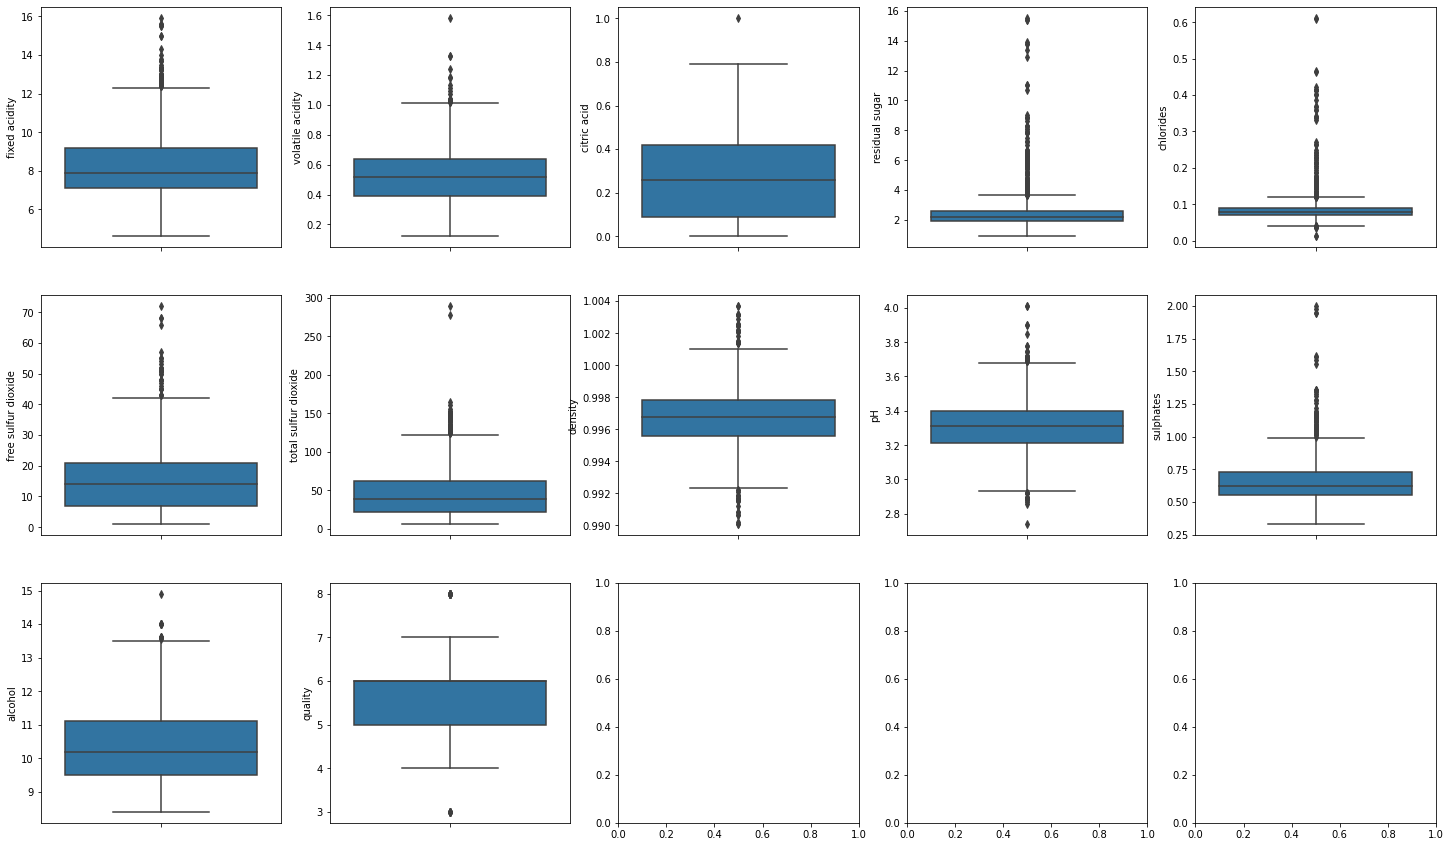

In [11]:
ls = []
a = 0
colName = [j for j in rawData.columns]
while a < 4:
    for i in range(5):
        ls.append((a, i))
    a += 1
fig, ax = plt.subplots(3, 5, figsize=(25, 15))
for k in range(12):
    sns.boxplot(ax=ax[ls[k][0], ls[k][1]], y=colName[k], data=rawData)
    

<AxesSubplot:ylabel='quality'>

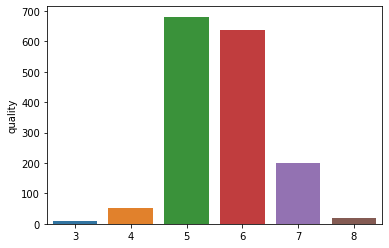

In [12]:
xquality=rawData['quality'].value_counts()
sns.barplot(y=xquality, x=xquality.index)

In [41]:
## Saphiro Wilk-Test

from scipy import stats

for i in dataST.columns:
    stat, p = stats.shapiro(dataST[i])
    if p > 0.05:
        print('{} feature has normal distribution (p ={})'.format(i, p))
    else:
        print('{} feature has not normal distribution (p = {})'.format(i, p))

('fixed acidity',) feature has not normal distribution (p = 1.5259681963245465e-24)
('volatile acidity',) feature has not normal distribution (p = 2.685542840862585e-16)
('citric acid',) feature has not normal distribution (p = 1.0208196357632134e-21)
('residual sugar',) feature has not normal distribution (p = 0.0)
('chlorides',) feature has not normal distribution (p = 0.0)
('free sulfur dioxide',) feature has not normal distribution (p = 7.700457545626541e-31)
('total sulfur dioxide',) feature has not normal distribution (p = 3.5739356012753986e-34)
('density',) feature has not normal distribution (p = 1.9282238028495158e-08)
('pH',) feature has not normal distribution (p = 1.7231333231393364e-06)
('sulphates',) feature has not normal distribution (p = 5.821402999956873e-38)
('alcohol',) feature has not normal distribution (p = 6.642436852066335e-27)


## Bivariate Analysis

In bivariate analysis I try to know the pattern and correlation between predictor and target variable (**quality**). From boxplot we know that some predictor like **alcohol, sulphates, and citric acid** has positive correlation with target variable. From literaure we know that **sulphate and alcohol** apppears in fermentation process. So, it's make sense if the **sulphate and alcohol** has positive correlation wiht quality of wine. The sulphate and alcohol value indicate age of wine.

Heatmap shows us the correlation between each feature. We can know some feature has strong correlation with other feature but it's not strong enough. 

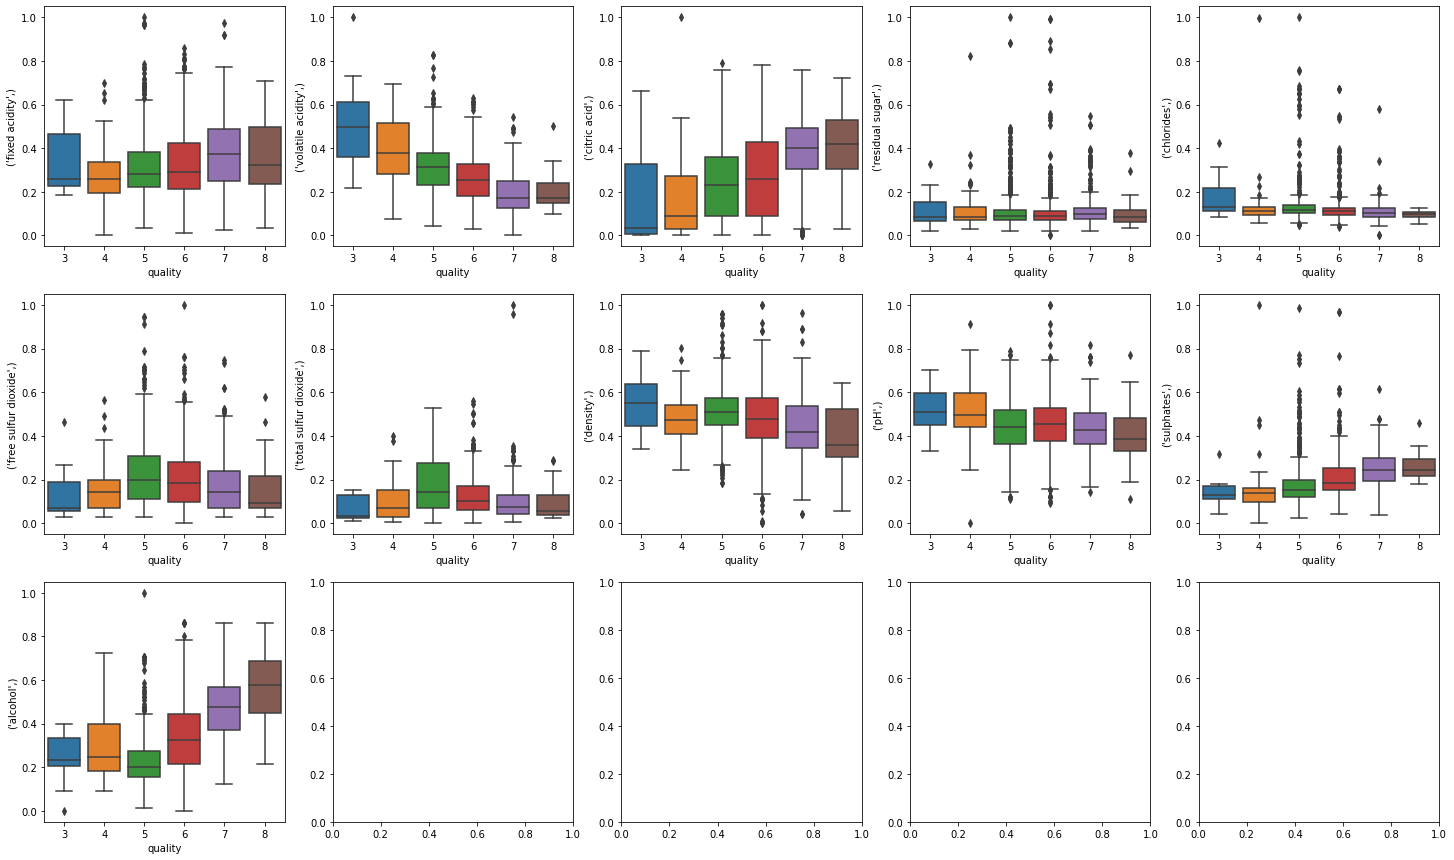

In [13]:
ls1 = []
b = 0
colName1 = [j for j in dataST.columns]
while b < 4:
    for i in range(5):
        ls1.append((b, i))
    b += 1
fig, ax1 = plt.subplots(3, 5, figsize=(25, 15))
for k in range(11):
    sns.boxplot(ax=ax1[ls1[k][0], ls1[k][1]], y=dataST[colName1[k]], x=y)

<AxesSubplot:xlabel='None', ylabel='None'>

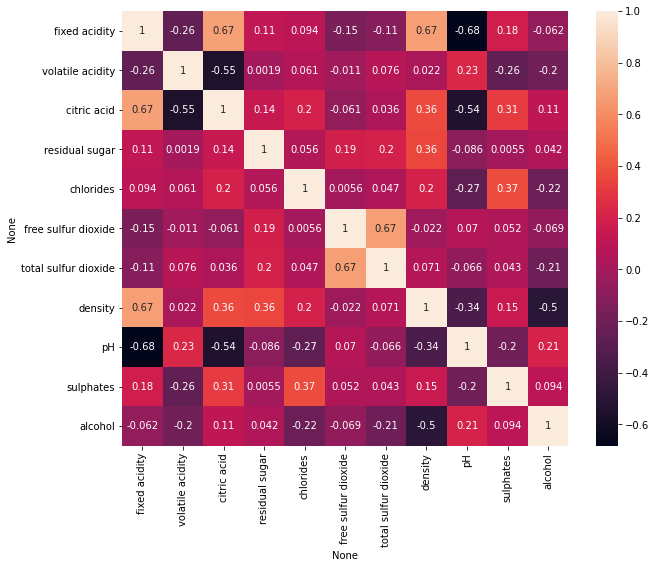

In [14]:
plt.figure(figsize=(10, 8))
corr = dataST.corr()
sns.heatmap(corr, annot=True)

## Feature Selection

I am using **Feature Importance** parameter from extra trees model.

<AxesSubplot:>

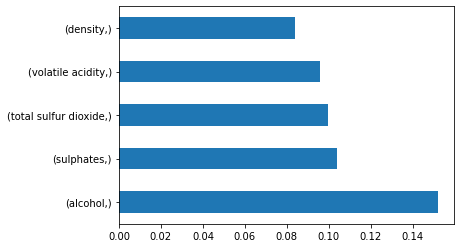

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
featImportance=pd.Series(model.feature_importances_, index=x_train.columns)
featImportance.nlargest(5).plot(kind='barh')

In [16]:
y = y.apply(lambda value : 1 if value >= 7 else 0)
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [25]:
X = dataST[['alcohol', 'total sulfur dioxide', 'sulphates', 'volatile acidity', 'density']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



## Oversampling

Because of dataset that we use unbalance, we need to balance it. It's to avoid bias in predicting label. I am using oversampling with SMOTE to balance the data. It's generate syntetic label of the data and we can avoid the bias.

In [18]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
y_train.value_counts()

0    1094
1    1094
Name: quality, dtype: int64

##  Building Model

In this process I build three different model. There are **KNN, Logistic Regression and SVM**. From model building result, we can conclude that **KNN** best performance among the other models. 

In [19]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy score of KNN :{}'.format(acc))

accuracy score of KNN :0.8


In [20]:
knn_params = {'n_neighbors':[2, 3, 5, 7, 9]}
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 7, 9]})

In [21]:
print('Best Parameters:', knn_cv.best_params_)

Best Parameters: {'n_neighbors': 2}


In [22]:
knn = KNeighborsClassifier(n_neighbors=2)
opt_knn = knn.fit(x_train, y_train)
y_predopt = opt_knn.predict(x_test)
accuracy_score(y_test, y_predopt)

0.896875

In [23]:
print(classification_report(y_test, y_predopt))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       288
           1       0.49      0.69      0.57        32

    accuracy                           0.90       320
   macro avg       0.73      0.80      0.76       320
weighted avg       0.92      0.90      0.90       320



In [28]:
from sklearn.linear_model import LogisticRegression

modelLog = LogisticRegression()
modelLog.fit(x_train, y_train)
predLog = modelLog.predict(x_test)
accuracylog = accuracy_score(y_test, predLog)
accuracylog

0.903125

In [29]:
print(classification_report(y_test, predLog))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       288
           1       0.60      0.09      0.16        32

    accuracy                           0.90       320
   macro avg       0.75      0.54      0.56       320
weighted avg       0.88      0.90      0.87       320



In [34]:
from sklearn.svm import SVC

modelsvm = SVC(kernel='poly')
modelsvm.fit(x_train, y_train)
predsvm = modelsvm.predict(x_test)
accsvm = accuracy_score(y_test, predsvm)
accsvm

0.903125

In [35]:
print(classification_report(y_test, predsvm))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       288
           1       0.54      0.22      0.31        32

    accuracy                           0.90       320
   macro avg       0.73      0.60      0.63       320
weighted avg       0.88      0.90      0.88       320

